# Reto Tecnologico

### Librerias

In [245]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Importación de recursos

In [246]:
#data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/CaseStudy/Attrition.csv')
data = pd.read_excel('C:/Users/Luciana Restrepo/Documents/Proyecto EAFIT/Caso1.xlsx')

### Desarrollo

Punto 1: Análisis explotorio 

In [247]:
data.head(10)

,Consecutivo Documento Deudor,Nit,Nombres,Numero Documento,Tipo De Producto,PRODUCTO,Valor Obligacion,Valor Vencido,Regional,REGION,...,Red,Cuadrante,Descripcion Causal,Calificacion Real,Fecha De Perfeccionamiento,Endeudamiento,Rango endeudamiento,Sector Economico,Profesion,Ocupacion
0,28768192,18,NaN,NaN,3,TARJETAS DE CREDITO,5637605.00,152093.00,2099,BOGOTA,...,1,TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,CALAMIDAD,2,1978-12-06,5637605.00,2015-01-01 00:00:00,NaN,SIN PROFESION,SIN OFICIO
1,2712044,22,NaN,NaN,5,CONSUMO,40584.00,40584.00,2099,BOGOTA,...,1,SIN CUADRANTE,SIN CAUSAL DE MORA,3,2015-03-11,40584.00,<1M,NaN,SIN PROFESION,SIN OFICIO
2,13587837,23,NaN,NaN,3,TARJETAS DE CREDITO,2786178.00,547088.00,3099,SUR,...,1,TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,RETRASO EN PAGO DE SALARIO,1,2003-03-27,7747280.00,2015-01-01 00:00:00,NaN,SIN PROFESION,JUBILADO
3,23479925,46,NaN,NaN,3,TARJETAS DE CREDITO,5904653.00,1455631.00,2099,BOGOTA,...,1,NO TIENE VOLUNTAD Y TIENE CAPACIDAD,DESCUIDO,1,1990-09-01,5904653.00,2015-01-01 00:00:00,NaN,SIN PROFESION,SIN OFICIO
4,2712382,92,NaN,NaN,5,CONSUMO,2221125.00,2221125.00,6399,CENTRO,...,1,TIENE VOLUNTAD Y TIENE CAPACIDAD,DESCUIDO,2,2015-05-12,2221125.00,2015-01-01 00:00:00,AGROPECUARIO,AGRICULTOR,TAXISTA
5,1683416,104,NaN,NaN,3,TARJETAS DE CREDITO,610840.00,349729.00,4599,CARIBE,...,1,NO TIENE VOLUNTAD Y TIENE CAPACIDAD,INGRESOS INSUFICIENTES,0,1972-10-01,610840.00,<1M,MADERAS Y SUS PRODUCTOS,CONTADOR,SIN OFICIO
6,4270407,106,NaN,NaN,3,TARJETAS DE CREDITO,1527464.00,1527464.00,1099,ANTIOQUIA,...,1,TIENE VOLUNTAD Y TIENE CAPACIDAD,DESCUIDO,1,2004-12-03,1574242.00,2015-01-01 00:00:00,TEXTILES Y CONFECCIONES,ADMINISTRADOR,SIN OFICIO
7,21947686,119,NaN,NaN,3,TARJETAS DE CREDITO,4310924.00,1239257.00,2099,BOGOTA,...,1,TIENE VOLUNTAD Y TIENE CAPACIDAD,DESCUIDO,1,1998-08-27,4310924.00,2015-01-01 00:00:00,NaN,SIN PROFESION,SIN OFICIO
8,2712477,120,NaN,NaN,5,CONSUMO,1110042.00,1110042.00,6199,CENTRO,...,1,TIENE VOLUNTAD Y TIENE CAPACIDAD,INGRESOS INSUFICIENTES,1,2015-06-10,8878707.00,2015-01-01 00:00:00,"CONSTRUCCION, CEMENTO Y ACTIVIDADES INMOBILIARIAS",SIN PROFESION,INDEPENDIENTE
9,19927288,129,NaN,NaN,3,TARJETAS DE CREDITO,5228504.00,547011.00,3099,SUR,...,1,TIENE VOLUNTAD Y TIENE CAPACIDAD,EXTRACTO NO ENTREGADO,1,2011-04-29,13101168.00,2015-01-01 00:00:00,NaN,SIN PROFESION,SIN OFICIO


In [248]:
data.dtypes

Consecutivo Documento Deudor             int64
Nit                                      int64
Nombres                                float64
Numero Documento                       float64
Tipo De Producto                         int64
PRODUCTO                                object
Valor Obligacion                       float64
Valor Vencido                          float64
Regional                                 int64
REGION                                  object
Abogado                                  int64
Dias Mora                                int64
FRANJA                                  object
Fecha Traslado Para Cobro       datetime64[ns]
Fecha Ultima Facturacion                object
Segmento                                object
Oficina Radicacion                       int64
Red                                      int64
Cuadrante                               object
Descripcion Causal                      object
Calificacion Real                        int64
Fecha De Perf

In [249]:
data.Profesion.value_counts()

SIN PROFESION                   57401
ADMINISTRADOR                    3773
INGENIERO                        3426
TECNICO  EXPERTO                 3119
NO APLICA AL TIPO DE CLIENTE     2829
                                ...  
ASTRONOMO                           3
EMPLEADO                            2
FILOSOFO                            2
BOTANICO                            1
ETNOGRAFO                           1
Name: Profesion, Length: 85, dtype: int64

In [250]:
data.PRODUCTO.value_counts()

TARJETAS DE CREDITO    51864
CONSUMO                19624
CH PROPIA               8720
VEHICULOS SUFI          5957
MASIVO SUFI             2942
CH TITU                  140
Name: PRODUCTO, dtype: int64

In [251]:
data.Ocupacion.value_counts()

SIN OFICIO                   56332
EMPLEADO SECTOR PRIVADO      14473
INDEPENDIENTE                11554
EMPLEADO SECTOR PUBLICO       4831
JUBILADO                       929
NO APLICA A ESTE PRODUCTO      667
AMA DE CASA                     86
TRABAJADOR OFICIAL              74
TAXISTA                         64
EMPLEADO FILIAL                 42
EMPLEADO BANCOLOMBIA            10
Name: Ocupacion, dtype: int64

In [252]:
data['Calificacion Real'].value_counts()

2    31003
1    29286
3    20787
0     8171
Name: Calificacion Real, dtype: int64

In [253]:
pd.crosstab(data["Cuadrante"],data["Ocupacion"],margins=True) #Tablas de frecuencia para análisis

Ocupacion,AMA DE CASA,EMPLEADO BANCOLOMBIA,EMPLEADO FILIAL,EMPLEADO SECTOR PRIVADO,EMPLEADO SECTOR PUBLICO,INDEPENDIENTE,JUBILADO,NO APLICA A ESTE PRODUCTO,SIN OFICIO,TAXISTA,TRABAJADOR OFICIAL,All
Cuadrante,,,,,,,,,,,,
NO TIENE VOLUNTAD Y NO TIENE CAPACIDAD,0,1,0,34,8,6,0,0,7,0,0,56
NO TIENE VOLUNTAD Y TIENE CAPACIDAD,8,2,3,952,373,925,126,59,3323,2,10,5783
SIN CUADRANTE,0,0,0,1,1,1,0,0,20997,0,0,21000
TIENE VOLUNTAD Y NO TIENE CAPACIDAD,0,1,0,121,40,114,23,5,260,0,0,564
TIENE VOLUNTAD Y TIENE CAPACIDAD,29,5,10,6424,1924,4632,284,218,13471,25,32,27054
TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,47,0,29,6567,2389,5720,490,375,17466,36,32,33151
All,84,9,42,14099,4735,11398,923,657,55524,63,74,87608


In [254]:
pd.crosstab(data["Cuadrante"],data["Descripcion Causal"],margins=True)

Descripcion Causal,ACOSTUMBRA A PAGAR ATRASADO,AFECTADO POR ESTAFA,AFECTADO POR PIRAMIDES,APARENTE FRAUDE,CALAMIDAD,CAMBIOS CLIMATICOS O FALLA HUMANA,CHEQUE DEVUELTO POR LA ENTIDAD,CLIENTE NO INFORMA CAUSAL,CUENTAS POR COBRAR,Condiciones diferentes a las incialmente pactadas,...,SIN CAUSAL DE MORA,SOBREENDEUDAMIENTO,TRAMITE REESTRUCTURACION - ACUERDO DE PAGO,TRAMITE SUBROGACION,Titular de un credito pagado por un tercero,Titular y/o Cotitular fallecido,VENTA A TERCERO,VIAJE,Victima por conflicto,All
Cuadrante,,,,,,,,,,,,,,,,,,,,,
NO TIENE VOLUNTAD Y NO TIENE CAPACIDAD,2,0,0,0,3,0,0,0,10,1,...,0,0,0,0,0,0,0,0,0,56
NO TIENE VOLUNTAD Y TIENE CAPACIDAD,38,4,1,0,270,5,10,55,452,9,...,1,96,0,0,21,0,0,18,1,5784
SIN CUADRANTE,55,0,0,0,26,3,0,16,90,0,...,20239,9,0,0,0,0,1,10,0,20999
TIENE VOLUNTAD Y NO TIENE CAPACIDAD,10,4,0,0,49,0,0,3,77,5,...,1,31,0,0,1,0,0,5,1,561
TIENE VOLUNTAD Y TIENE CAPACIDAD,347,10,13,6,1040,14,63,676,2680,26,...,6,363,0,1,37,1,5,385,1,27071
TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,205,49,6,9,2677,52,33,228,4476,172,...,15,1062,6,1,110,11,10,281,8,33152
All,657,67,20,15,4065,74,106,978,7785,213,...,20262,1561,6,2,169,12,16,699,11,87623


In [255]:
pd.crosstab(data["Ocupacion"],data["Descripcion Causal"],margins=True)

Descripcion Causal,ACOSTUMBRA A PAGAR ATRASADO,AFECTADO POR ESTAFA,AFECTADO POR PIRAMIDES,APARENTE FRAUDE,CALAMIDAD,CAMBIOS CLIMATICOS O FALLA HUMANA,CHEQUE DEVUELTO POR LA ENTIDAD,CLIENTE NO INFORMA CAUSAL,CUENTAS POR COBRAR,Condiciones diferentes a las incialmente pactadas,...,SIN CAUSAL DE MORA,SOBREENDEUDAMIENTO,TRAMITE REESTRUCTURACION - ACUERDO DE PAGO,TRAMITE SUBROGACION,Titular de un credito pagado por un tercero,Titular y/o Cotitular fallecido,VENTA A TERCERO,VIAJE,Victima por conflicto,All
Ocupacion,,,,,,,,,,,,,,,,,,,,,
AMA DE CASA,1,0,0,0,7,0,1,1,11,0,...,0,0,0,0,0,0,0,0,1,86
EMPLEADO BANCOLOMBIA,0,0,0,0,0,0,0,0,1,0,...,0,2,0,0,0,0,0,0,0,10
EMPLEADO FILIAL,0,0,0,0,3,0,0,0,5,0,...,0,1,0,0,1,0,0,0,0,42
EMPLEADO SECTOR PRIVADO,117,4,2,5,960,1,11,151,1249,25,...,1,446,3,2,40,1,8,153,1,14410
EMPLEADO SECTOR PUBLICO,27,1,0,2,393,0,4,54,397,11,...,0,151,0,0,9,0,0,65,0,4811
INDEPENDIENTE,97,19,2,2,665,39,12,96,2697,41,...,1,218,0,0,34,0,1,153,5,11518
JUBILADO,3,3,0,0,158,1,1,4,93,6,...,0,53,0,0,1,0,0,8,0,911
NO APLICA A ESTE PRODUCTO,7,0,0,1,36,0,0,10,77,2,...,0,21,0,0,1,0,1,3,0,666
SIN OFICIO,435,40,15,5,1858,33,311,669,3327,126,...,20289,678,3,0,87,11,6,346,4,56211


In [256]:
pd.crosstab(data["Dias Mora"],data["Descripcion Causal"],margins=True)

Descripcion Causal,ACOSTUMBRA A PAGAR ATRASADO,AFECTADO POR ESTAFA,AFECTADO POR PIRAMIDES,APARENTE FRAUDE,CALAMIDAD,CAMBIOS CLIMATICOS O FALLA HUMANA,CHEQUE DEVUELTO POR LA ENTIDAD,CLIENTE NO INFORMA CAUSAL,CUENTAS POR COBRAR,Condiciones diferentes a las incialmente pactadas,...,SIN CAUSAL DE MORA,SOBREENDEUDAMIENTO,TRAMITE REESTRUCTURACION - ACUERDO DE PAGO,TRAMITE SUBROGACION,Titular de un credito pagado por un tercero,Titular y/o Cotitular fallecido,VENTA A TERCERO,VIAJE,Victima por conflicto,All
Dias Mora,,,,,,,,,,,,,,,,,,,,,
1,24,0,1,0,20,0,0,16,72,2,...,101,8,0,0,0,0,0,6,0,849
2,20,1,1,0,19,0,0,6,76,2,...,50,9,0,0,2,0,0,9,0,762
3,7,0,0,0,17,0,0,12,52,1,...,56,9,0,0,2,0,0,5,0,641
4,17,0,1,0,32,0,2,7,98,1,...,196,9,0,0,2,1,0,8,0,1043
5,18,1,2,1,27,0,1,6,114,2,...,207,13,0,0,1,0,0,11,0,1077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1556,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [257]:
pd.crosstab(data["PRODUCTO"],data["Ocupacion"],margins=True)

Ocupacion,AMA DE CASA,EMPLEADO BANCOLOMBIA,EMPLEADO FILIAL,EMPLEADO SECTOR PRIVADO,EMPLEADO SECTOR PUBLICO,INDEPENDIENTE,JUBILADO,NO APLICA A ESTE PRODUCTO,SIN OFICIO,TAXISTA,TRABAJADOR OFICIAL,All
PRODUCTO,,,,,,,,,,,,
CH PROPIA,19,0,4,1685,686,1686,85,144,4331,18,11,8669
CH TITU,0,0,0,12,10,61,4,4,49,0,0,140
CONSUMO,12,2,4,2770,887,3219,345,141,12187,18,8,19593
MASIVO SUFI,4,2,14,653,166,346,17,27,1703,1,6,2939
TARJETAS DE CREDITO,43,6,11,8302,2674,4848,422,292,35116,25,29,51768
VEHICULOS SUFI,8,0,9,1051,408,1394,56,59,2946,2,20,5953
All,86,10,42,14473,4831,11554,929,667,56332,64,74,89062


In [258]:
print('Promedio: ' + str(data['Dias Mora'].mean()))
print('Mediana: ' + str(data['Dias Mora'].median()))
print('Moda: ' + str(data['Dias Mora'].mode()))

Promedio: 47.099319865093506
Mediana: 30.0
Moda: 0    30
dtype: int64


In [259]:
print('Promedio: ' + str(data['Valor Obligacion'].mean()))
print('Mediana: ' + str(data['Valor Obligacion'].median()))
print('Moda: ' + str(data['Valor Obligacion'].mode()))

Promedio: 7069209.776261833
Mediana: 1927124.0
Moda: 0   46869.00
dtype: float64


In [260]:
print(data[data["Ocupacion"]=="SIN OFICIO"]["Valor Obligacion"].mean())
print(data[data["Ocupacion"]=="INDEPENDIENTE"]["Valor Obligacion"].mean())
print(data[data["Ocupacion"]=="EMPLEADO SECTOR PRIVADO"]["Valor Obligacion"].mean())

6332527.486595348
11102187.658376306
6411423.679490089


Seleccionamos las columnas de mayor interés para trabajar el dataset. 

In [261]:
data_real = data[['Valor Obligacion', 'Valor Vencido', 'REGION', 'Dias Mora', 'FRANJA', 'Segmento',\
                 "Red", 'Cuadrante', 'Descripcion Causal', 'Calificacion Real', \
                  'Endeudamiento', 'Rango endeudamiento', 'Profesion', 'Ocupacion', "Abogado"]]
pd.options.display.float_format = '{:.2f}'.format #Convertimos los números de notación cientifica a enteros
data_real.head(5) 

,Valor Obligacion,Valor Vencido,REGION,Dias Mora,FRANJA,Segmento,Red,Cuadrante,Descripcion Causal,Calificacion Real,Endeudamiento,Rango endeudamiento,Profesion,Ocupacion,Abogado
0,5637605.00,152093.00,BOGOTA,30,<30,PERSONAL PLUS,1,TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,CALAMIDAD,2,5637605.00,2015-01-01 00:00:00,SIN PROFESION,SIN OFICIO,109978
1,40584.00,40584.00,BOGOTA,110,91-120,PERSONAL PLUS,1,SIN CUADRANTE,SIN CAUSAL DE MORA,3,40584.00,<1M,SIN PROFESION,SIN OFICIO,109976
2,2786178.00,547088.00,SUR,60,31-60,PERSONAS,1,TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,RETRASO EN PAGO DE SALARIO,1,7747280.00,2015-01-01 00:00:00,SIN PROFESION,JUBILADO,109978
3,5904653.00,1455631.00,BOGOTA,90,61-90,PYMES,1,NO TIENE VOLUNTAD Y TIENE CAPACIDAD,DESCUIDO,1,5904653.00,2015-01-01 00:00:00,SIN PROFESION,SIN OFICIO,109978
4,2221125.00,2221125.00,CENTRO,48,31-60,PERSONAL PLUS,1,TIENE VOLUNTAD Y TIENE CAPACIDAD,DESCUIDO,2,2221125.00,2015-01-01 00:00:00,AGRICULTOR,TAXISTA,109978


In [262]:
data_real.describe()

,Valor Obligacion,Valor Vencido,Dias Mora,Red,Calificacion Real,Endeudamiento,Abogado
count,89247.00,89247.00,89247.00,89247.00,89247.00,89247.00,89247.00
mean,7069209.78,706280.70,47.10,1.30,1.72,14320682.09,109977.55
std,15190138.61,1878658.72,70.11,0.64,0.92,29167284.36,1.30
min,18044.00,20010.00,1.00,1.00,0.00,18044.00,109970.00
25%,765516.50,104248.00,26.00,1.00,1.00,1292230.50,109978.00
50%,1927124.00,241937.00,30.00,1.00,2.00,4600062.00,109978.00
75%,5812533.00,611284.50,46.00,1.00,2.00,16974180.00,109978.00
max,671335650.10,183108691.00,2175.00,3.00,3.00,2012549283.00,109978.00


In [263]:
data_real = pd.DataFrame(data_real)

Tratamiento de variables categóricas para mejor manipulación de los datos, y transformación de la base de datos para posterior aplicación del modelo

In [264]:
warnings.filterwarnings("ignore")
data_real['FRANJA'] = [1 if valor == "<30" else
                        2 if valor == "31-60" else
                        3 if valor == "61-90" else
                        4 if valor == "91-120" else
                        5 if valor == "121-180" else
                        6 for valor in data_real["FRANJA"]]

In [265]:
warnings.filterwarnings("ignore")
data_real['Rango endeudamiento'] = data_real['Rango endeudamiento'].astype(str)
data_real['Rango endeudamiento'] = data_real['Rango endeudamiento'].replace('2015-01-01 00:00:00','1-15')

data_real['Rango endeudamiento'] = [1 if valor == "<1M" else
                                    2 if valor == "1-15" else
                                    3 if valor == "15-50" else
                                    4 if valor == "50-100" else
                                    5 if valor == "100-200" else
                                    6 for valor in data_real["Rango endeudamiento"]]

Identificación y manejo de datos faltantes, duplicados o valores atípicos

<AxesSubplot:>

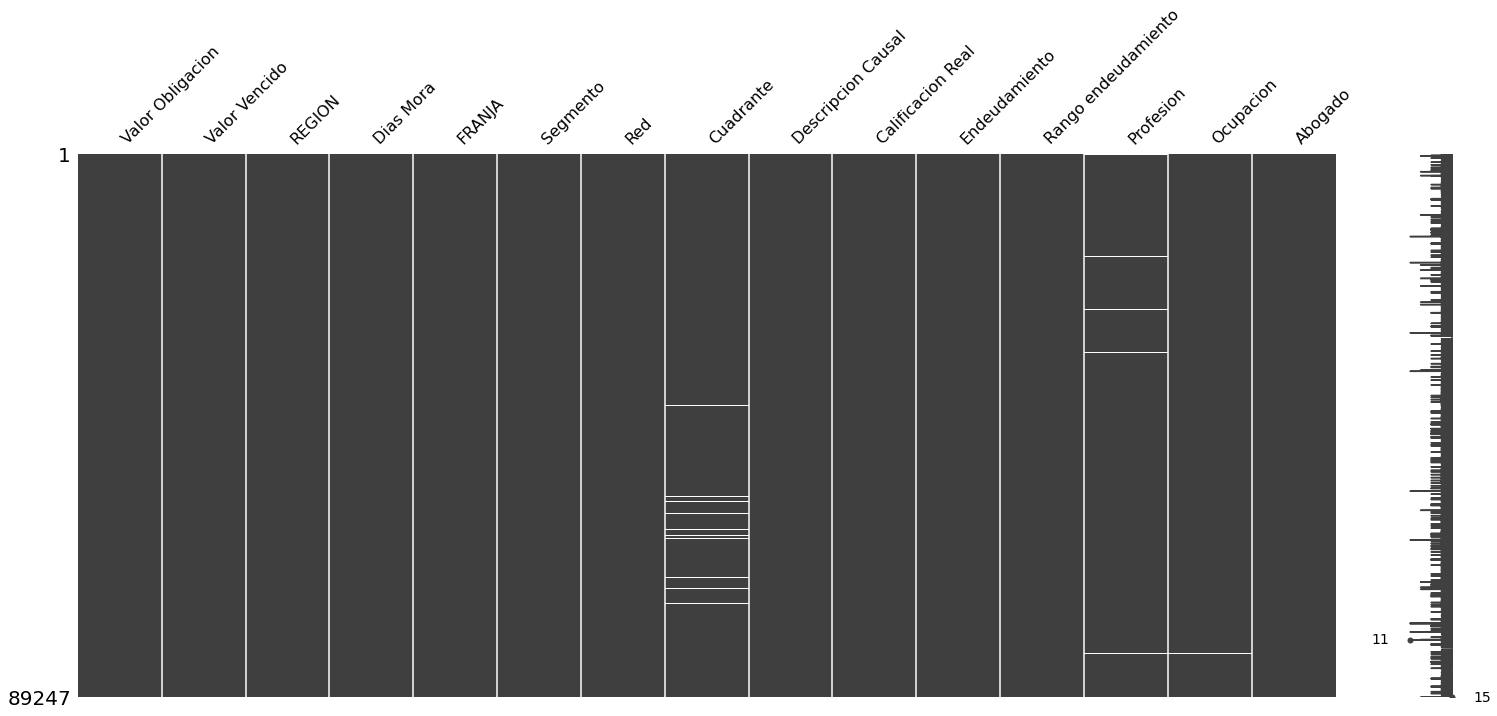

In [266]:
import missingno as msn #Mostrar columnas con datos nulos
msn.matrix(data_real)

Tratamiento de datos faltantes en la variable "Ocupación"

In [267]:
ocup_null = data_real.loc[data_real['Ocupacion'].isna()] #Seleccionar campos vacíos en la variable ocupación

In [268]:
ocup_null['Profesion'].value_counts() #Relacionarlo con la variable profesión para identificar el patrón de los faltantes
#y reemplazar los valores nulos en ocupación

ARQUEOLOGO                      54
SIN PROFESION                   22
ARBITRO                         13
INGENIERO                        6
TECNOLOGO                        4
ADMINISTRADOR                    4
OPERARIO INDUSTRIAL              3
NO APLICA AL TIPO DE CLIENTE     3
ABOGADO                          2
ECONOMISTA                       2
TECNICO  EXPERTO                 2
CONDUCTOR                        1
PROFESOR                         1
SERVICIO DOMESTICO               1
AUXILIAR                         1
ENFERMERO(A)                     1
Name: Profesion, dtype: int64

In [269]:
data_real['Profesion'].value_counts()

SIN PROFESION                   57401
ADMINISTRADOR                    3773
INGENIERO                        3426
TECNICO  EXPERTO                 3119
NO APLICA AL TIPO DE CLIENTE     2829
                                ...  
ASTRONOMO                           3
EMPLEADO                            2
FILOSOFO                            2
BOTANICO                            1
ETNOGRAFO                           1
Name: Profesion, Length: 85, dtype: int64

In [270]:
data_real['Ocupacion'].value_counts()

SIN OFICIO                   56332
EMPLEADO SECTOR PRIVADO      14473
INDEPENDIENTE                11554
EMPLEADO SECTOR PUBLICO       4831
JUBILADO                       929
NO APLICA A ESTE PRODUCTO      667
AMA DE CASA                     86
TRABAJADOR OFICIAL              74
TAXISTA                         64
EMPLEADO FILIAL                 42
EMPLEADO BANCOLOMBIA            10
Name: Ocupacion, dtype: int64

In [271]:
profesion= data_real.loc[data_real["Profesion"]== "ARQUEOLOGO"] #Analizamos la profesión de arqueologo ya que era la que
profesion #más nulos tenía y para identificar su ocupacion 

,Valor Obligacion,Valor Vencido,REGION,Dias Mora,FRANJA,Segmento,Red,Cuadrante,Descripcion Causal,Calificacion Real,Endeudamiento,Rango endeudamiento,Profesion,Ocupacion,Abogado
394,6215476.00,5239393.00,CARIBE,765,6,PERSONAS,1,NaN,NaN,3,28164865.65,3,ARQUEOLOGO,NaN,109976
556,9881320.61,299975.67,SUR,48,2,PERSONAS,2,TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,CALAMIDAD,3,9881320.61,2,ARQUEOLOGO,SIN OFICIO,109978
603,17833885.13,1576967.22,SUR,244,6,PERSONAS,2,TIENE VOLUNTAD Y TIENE CAPACIDAD,INGRESOS INSUFICIENTES,2,17833885.13,3,ARQUEOLOGO,SIN OFICIO,109976
744,30345960.00,4133950.00,CENTRO,66,3,PYMES,1,NaN,NaN,3,30345960.00,3,ARQUEOLOGO,SIN OFICIO,109978
995,14985781.69,181306.42,BOGOTA,19,1,PERSONAS,2,TIENE VOLUNTAD Y TIENE CAPACIDAD,DESCUIDO,2,14985781.69,2,ARQUEOLOGO,EMPLEADO SECTOR PRIVADO,109978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87273,17686169.39,619040.44,BOGOTA,38,2,PERSONAS,2,TIENE VOLUNTAD Y TIENE CAPACIDAD,EN COBRO JURIDICO,3,17686169.39,3,ARQUEOLOGO,SIN OFICIO,109978
87443,4209038.38,1275471.66,BOGOTA,65,3,PERSONAS,2,NaN,CHEQUE DEVUELTO POR LA ENTIDAD,3,4209038.38,2,ARQUEOLOGO,NaN,109976
87448,33686785.47,392282.31,SUR,61,3,PERSONAL PLUS,2,TIENE VOLUNTAD Y TIENE CAPACIDAD,INGRESOS INSUFICIENTES,3,33686785.47,3,ARQUEOLOGO,SIN OFICIO,109976
88372,101163.00,101163.00,BOGOTA,109,4,PERSONAL PLUS,1,TIENE VOLUNTAD Y TIENE CAPACIDAD,DESCUIDO,3,101163.00,1,ARQUEOLOGO,INDEPENDIENTE,109976


In [272]:
profesion["Ocupacion"].value_counts() #Identidficamos la ocupación de los arqueologos, y la gran mayoría están sin oficio
#por lo que asumimos, que los nulos no tienen oficio.

SIN OFICIO                   225
INDEPENDIENTE                 59
EMPLEADO SECTOR PRIVADO       47
EMPLEADO SECTOR PUBLICO       26
NO APLICA A ESTE PRODUCTO      3
JUBILADO                       2
TAXISTA                        1
AMA DE CASA                    1
Name: Ocupacion, dtype: int64

In [273]:
def ocupacion_nulos(ocupacion): #Relacionamos variable profesion con ocupación para suplir nulos 
    if pd.isna(ocupacion):   #Reemplzar los nulos de ocupación con "SIN OFICIO"
        return 'SIN OFICIO'
    else:
        return ocupacion

data_real['Ocupacion'] = data_real['Ocupacion'].apply(ocupacion_nulos) 

Al relacionar las columnas profesión y ocupación llegamos a la conclusión de que la mayoría de valores nulos en ocupación, deberían ser reemplazados por "SIN OFICIO" gracias al análisis anterior.  

Tratamiento de nulos en variable "´Profesión"

In [274]:
nulosprof = data_real.loc[data['Profesion'].isna()]
nulosprof

,Valor Obligacion,Valor Vencido,REGION,Dias Mora,FRANJA,Segmento,Red,Cuadrante,Descripcion Causal,Calificacion Real,Endeudamiento,Rango endeudamiento,Profesion,Ocupacion,Abogado
202,2006596.00,2006596.00,ANTIOQUIA,180,5,PERSONAL PLUS,1,TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,DISMINUCION DE SALARIO y/o INGRESOS,1,31096316.00,3,NaN,EMPLEADO SECTOR PRIVADO,109976
211,153284.00,153284.00,BOGOTA,118,4,MICROPYME,1,TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,CUENTAS POR COBRAR,3,3065918.00,2,NaN,INDEPENDIENTE,109976
246,2769207.00,520984.00,BOGOTA,30,1,MICROPYME,1,TIENE VOLUNTAD Y TIENE CAPACIDAD,CALAMIDAD,2,42811532.00,3,NaN,INDEPENDIENTE,109978
307,6708999.00,1212507.00,BOGOTA,60,2,PERSONAL PLUS,1,TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,DESCUIDO,0,6708999.00,2,NaN,INDEPENDIENTE,109978
317,37011583.00,2943223.00,BOGOTA,38,2,PERSONAL PLUS,1,TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,DESCUIDO,3,37029655.00,3,NaN,EMPLEADO SECTOR PRIVADO,109978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88551,667999.00,665994.00,BOGOTA,120,4,PERSONAL PLUS,1,TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,PAGO NO APLICADO O MAL APLICADO,3,1266233.00,2,NaN,JUBILADO,109976
88552,1289937.00,313542.00,BOGOTA,92,4,PERSONAL PLUS,1,TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,CLIENTE NO INFORMA CAUSAL,3,1289937.00,2,NaN,SIN OFICIO,109976
88623,2792274.00,845009.00,BOGOTA,105,4,PERSONAL PLUS,1,TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,DESEMPLEADO TITULAR Y/O COTITULAR,3,2792274.00,2,NaN,SIN OFICIO,109976
88852,826726.00,826726.00,CARIBE,120,4,PERSONAS,1,TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,DESEMPLEADO TITULAR Y/O COTITULAR,3,826726.00,1,NaN,EMPLEADO SECTOR PRIVADO,109976


In [275]:
profnul = data_real.loc[data_real['Ocupacion']== "SIN OFICIO"] #Seleccionamos los registros que en la columna ocupación no tienen oficio


In [276]:
profnul["Profesion"].value_counts() #Conteo de profesiones sin oficio

SIN PROFESION                   49114
ARBITRO                           980
ADMINISTRADOR                     774
NO APLICA AL TIPO DE CLIENTE      676
INGENIERO                         616
                                ...  
FONTANERO                           1
CARTOGRAFO                          1
ATLETA  DEPORTISTA                  1
CONTROLADOR AEREO                   1
ASTROLOGO                           1
Name: Profesion, Length: 77, dtype: int64

De lo anterior, concluimos que los valores nulos en profesión, en su mayoría no tienen oficio. Asu vez, las personas que no tienen oficio tampoco tienen profesion. Por lo tanto, decidimos suplir los valores nulos de profesión con "SIN PROFESION".

In [277]:
def profesion_nulos(profesion): #Relacionamos variable ocupación con profesión para suplir nulos 
    if pd.isna(profesion):   #Reemplzar los nulos de ocupación con "SIN OFICIO"
        return 'SIN PROFESION'
    else:
        return profesion

data_real['Profesion'] = data_real['Profesion'].apply(profesion_nulos) 

Tratamiento valores nulos en la variable "Cuadrante"

In [278]:
cuad_null = data_real.loc[data_real['Cuadrante'].isna()]

In [279]:
cuad_null

,Valor Obligacion,Valor Vencido,REGION,Dias Mora,FRANJA,Segmento,Red,Cuadrante,Descripcion Causal,Calificacion Real,Endeudamiento,Rango endeudamiento,Profesion,Ocupacion,Abogado
287,437013.00,230050.00,BOGOTA,30,1,PERSONAL PLUS,1,NaN,NaN,1,501190.00,1,ACTOR - ARTISTA,SIN OFICIO,109978
324,18217955.00,18217955.00,ANTIOQUIA,360,6,PERSONAL PLUS,1,NaN,CHEQUE DEVUELTO POR LA ENTIDAD,3,37614570.00,3,ARBITRO,SIN OFICIO,109976
326,4679415.00,4679415.00,ANTIOQUIA,330,6,PERSONAL PLUS,1,NaN,CHEQUE DEVUELTO POR LA ENTIDAD,3,37614570.00,3,ARBITRO,SIN OFICIO,109976
327,1892176.00,1892176.00,ANTIOQUIA,360,6,PERSONAL PLUS,1,NaN,CHEQUE DEVUELTO POR LA ENTIDAD,3,37614570.00,3,ARBITRO,SIN OFICIO,109976
394,6215476.00,5239393.00,CARIBE,765,6,PERSONAS,1,NaN,NaN,3,28164865.65,3,ARQUEOLOGO,SIN OFICIO,109976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88685,4645172.00,938496.00,BOGOTA,106,4,PERSONAL PLUS,3,NaN,CUENTAS POR COBRAR,3,4645172.00,2,NO APLICA AL TIPO DE CLIENTE,INDEPENDIENTE,109976
88689,714271.00,714271.00,BOGOTA,120,4,PERSONAL PLUS,1,NaN,DESEMPLEADO TITULAR Y/O COTITULAR,3,4970426.00,2,ADMINISTRADOR,INDEPENDIENTE,109976
88690,4256155.00,656925.00,BOGOTA,92,4,PERSONAL PLUS,1,NaN,DESEMPLEADO TITULAR Y/O COTITULAR,3,4970426.00,2,ADMINISTRADOR,INDEPENDIENTE,109976
88845,716664.00,716664.00,CARIBE,120,4,PERSONAS,1,NaN,INGRESOS INSUFICIENTES,3,716664.00,1,ARBITRO,SIN OFICIO,109976


In [280]:
def cuadrante_nulos(cuadrante): #Relacionamos variable ocupación con profesión para suplir nulos 
    if pd.isna(cuadrante):   #Reemplzar los nulos de ocupación con "SIN OFICIO"
        return 'SIN CUADRANTE'
    else:
        return cuadrante

data_real['Cuadrante'] = data_real['Cuadrante'].apply(cuadrante_nulos) 

Tratamiento variables categóricas con get dummies

In [281]:
columnas_dummies = ['Segmento','Cuadrante',"REGION", "Ocupacion", "Descripcion Causal", "Profesion"]
X = data_real.copy()
X = pd.get_dummies(X, columns = columnas_dummies)
data_dummies= X.copy()
data_dummies

,Valor Obligacion,Valor Vencido,Dias Mora,FRANJA,Red,Calificacion Real,Endeudamiento,Rango endeudamiento,Abogado,Segmento_MICROPYME,...,Profesion_SIN PROFESION,Profesion_SOCIOLOGO,Profesion_TECNICO EXPERTO,Profesion_TECNOLOGO,Profesion_TOPOGRAFO AGRIMENSOR,Profesion_TRABAJADOR SOCIAL,Profesion_VETERINARIO,Profesion_VIGILANTE PORTERO CONSERJE,Profesion_ZAPATERO,Profesion_ZOOTECNISTA
0,5637605.00,152093.00,30,1,1,2,5637605.00,2,109978,0,...,1,0,0,0,0,0,0,0,0,0
1,40584.00,40584.00,110,4,1,3,40584.00,1,109976,0,...,1,0,0,0,0,0,0,0,0,0
2,2786178.00,547088.00,60,2,1,1,7747280.00,2,109978,0,...,1,0,0,0,0,0,0,0,0,0
3,5904653.00,1455631.00,90,3,1,1,5904653.00,2,109978,0,...,1,0,0,0,0,0,0,0,0,0
4,2221125.00,2221125.00,48,2,1,2,2221125.00,2,109978,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89242,2048599.00,284377.00,95,4,1,3,37088351.03,3,109976,0,...,0,0,0,0,0,0,0,0,0,0
89243,33835903.00,2790040.00,104,4,1,3,45757681.00,3,109976,0,...,1,0,0,0,0,0,0,0,0,0
89244,1540300.00,1511822.00,107,4,1,3,45757681.00,3,109976,0,...,1,0,0,0,0,0,0,0,0,0
89245,3954718.00,609495.00,107,4,1,3,45757681.00,3,109976,0,...,1,0,0,0,0,0,0,0,0,0


In [282]:
data_dummies.columns

Index(['Valor Obligacion', 'Valor Vencido', 'Dias Mora', 'FRANJA', 'Red',
       'Calificacion Real', 'Endeudamiento', 'Rango endeudamiento', 'Abogado',
       'Segmento_MICROPYME',
       ...
       'Profesion_SIN PROFESION', 'Profesion_SOCIOLOGO',
       'Profesion_TECNICO  EXPERTO ', 'Profesion_TECNOLOGO',
       'Profesion_TOPOGRAFO  AGRIMENSOR', 'Profesion_TRABAJADOR SOCIAL',
       'Profesion_VETERINARIO', 'Profesion_VIGILANTE PORTERO CONSERJE',
       'Profesion_ZAPATERO', 'Profesion_ZOOTECNISTA'],
      dtype='object', length=173)

Agregar columnas de información con datos obtenidos del DF

In [283]:
data_dummies["porcentaje_endeudamiento"] = (data_dummies["Valor Obligacion"]/data_real["Endeudamiento"]*100)

#### Punto 2: Identificar causales de incumplimiento

Análisis de las causas de incumplimiento


In [284]:
pd.crosstab(data_dummies["Dias Mora"],data_dummies["Calificacion Real"],margins=True)

Calificacion Real,0,1,2,3,All
Dias Mora,,,,,
1,94,363,290,106,853
2,65,318,264,115,762
3,51,246,230,115,642
4,83,307,424,232,1046
5,78,292,464,247,1081
...,...,...,...,...,...
2010,0,0,2,0,2
2071,0,0,1,0,1
2113,0,0,1,0,1


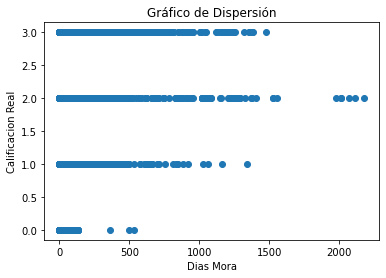

In [285]:

x = data_dummies['Dias Mora']
y = data_dummies['Calificacion Real']

plt.scatter(x, y)
plt.xlabel('Dias Mora')
plt.ylabel('Calificacion Real')
plt.title('Gráfico de Dispersión')
plt.show()

calificación vs dias de mora
0--------------0-500
1--------------0-1500
2--------------0-2500
3--------------0-1500

Los más morosos son los que están en el grupo 2, seguidos del grupo 3, 1, y 0 por último.

In [286]:
conteo_valores = data_real['Cuadrante'].value_counts() #porcentaje que representa cada uno de los cuadrantes
# Calcular el porcentaje de cada valor único sobre el total de datos
porcentaje_valores = (conteo_valores / data_real['Cuadrante'].count()) * 100

In [287]:
porcentaje_valores

TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA   37.22
TIENE VOLUNTAD Y TIENE CAPACIDAD            30.39
SIN CUADRANTE                               25.21
NO TIENE VOLUNTAD Y TIENE CAPACIDAD          6.49
TIENE VOLUNTAD Y NO TIENE CAPACIDAD          0.63
NO TIENE VOLUNTAD Y NO TIENE CAPACIDAD       0.06
Name: Cuadrante, dtype: float64

TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA   37.22---------------- GRUPO 1

TIENE VOLUNTAD Y TIENE CAPACIDAD            30.39---------------- GRUPO 4

SIN CUADRANTE                               25.21---------------- GRUPO 2

NO TIENE VOLUNTAD Y TIENE CAPACIDAD          6.49---------------- GRUPO 3

TIENE VOLUNTAD Y NO TIENE CAPACIDAD          0.63---------------- GRUPO 6

NO TIENE VOLUNTAD Y NO TIENE CAPACIDAD       0.06---------------- GRUPO 5

In [288]:
conteo_valores2 = data_real['Descripcion Causal'].value_counts() #porcentaje que representa cada uno de las descripciones causales
# Calcular el porcentaje de cada valor único sobre el total de datos
porcentaje_valores2 = (conteo_valores2 / data_real['Descripcion Causal'].count()) * 100

In [289]:
porcentaje_valores2

DESCUIDO                                            28.00
SIN CAUSAL DE MORA                                  22.81
CUENTAS POR COBRAR                                   8.86
CALAMIDAD                                            4.60
RETRASO EN PAGO DE SALARIO                           4.19
INGRESOS INSUFICIENTES                               4.10
DISMINUCION DE SALARIO y/o INGRESOS                  3.79
DESEMPLEADO TITULAR Y/O COTITULAR                    3.55
PAGO NO APLICADO                                     3.42
NO COINCIDE FECHA VENCIMIENTO CON INGRESOS           2.51
PAGO NO APLICADO O MAL APLICADO                      2.29
SOBREENDEUDAMIENTO                                   1.77
EXTRACTO NO ENTREGADO                                1.60
CLIENTE NO INFORMA CAUSAL                            1.11
PAGO OTRAS DEUDAS                                    1.03
VIAJE                                                0.82
ACOSTUMBRA A PAGAR ATRASADO                          0.77
DESEMPLEADO TI

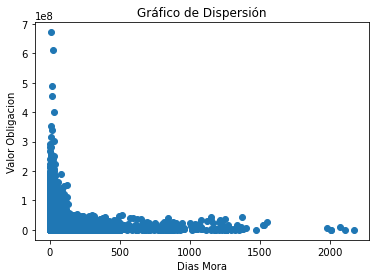

In [290]:

x = data_dummies['Dias Mora']
y = data_dummies['Valor Obligacion']

plt.scatter(x, y)
plt.xlabel('Dias Mora')
plt.ylabel('Valor Obligacion')
plt.title('Gráfico de Dispersión')
plt.show()

Hay una tendencia de que cuando el valor de la obligación es bajo, las personas suelen tener más días de mora, y esto lo relacionamos con la descripción causal de mayor peso que es descuido.


In [291]:
rep= data_real.loc[data_real['Valor Vencido'] == data_real['Valor Obligacion']]

In [292]:
rep 

,Valor Obligacion,Valor Vencido,REGION,Dias Mora,FRANJA,Segmento,Red,Cuadrante,Descripcion Causal,Calificacion Real,Endeudamiento,Rango endeudamiento,Profesion,Ocupacion,Abogado
1,40584.00,40584.00,BOGOTA,110,4,PERSONAL PLUS,1,SIN CUADRANTE,SIN CAUSAL DE MORA,3,40584.00,1,SIN PROFESION,SIN OFICIO,109976
4,2221125.00,2221125.00,CENTRO,48,2,PERSONAL PLUS,1,TIENE VOLUNTAD Y TIENE CAPACIDAD,DESCUIDO,2,2221125.00,2,AGRICULTOR,TAXISTA,109978
6,1527464.00,1527464.00,ANTIOQUIA,60,2,PERSONAL PLUS,1,TIENE VOLUNTAD Y TIENE CAPACIDAD,DESCUIDO,1,1574242.00,2,ADMINISTRADOR,SIN OFICIO,109978
8,1110042.00,1110042.00,CENTRO,19,1,MICROPYME,1,TIENE VOLUNTAD Y TIENE CAPACIDAD,INGRESOS INSUFICIENTES,1,8878707.00,2,SIN PROFESION,INDEPENDIENTE,109978
12,874684.00,874684.00,BOGOTA,120,4,PERSONAS,1,SIN CUADRANTE,SIN CAUSAL DE MORA,2,874684.00,1,SIN PROFESION,SIN OFICIO,109976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89216,5321263.00,5321263.00,SUR,120,4,PERSONAL PLUS,1,TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,CALAMIDAD,3,11401298.00,2,ADMINISTRADOR,SIN OFICIO,109976
89219,2645308.00,2645308.00,SUR,120,4,PERSONAS,1,TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,DESEMPLEADO TITULAR Y/O COTITULAR,3,11761288.00,2,AUXILIAR,SIN OFICIO,109976
89222,1493994.00,1493994.00,SUR,120,4,PERSONAL PLUS,1,TIENE VOLUNTAD Y TIENE CAPACIDAD,NO COINCIDE FECHA VENCIMIENTO CON INGRESOS,3,12251232.00,2,FISIOTERAPEUTA,SIN OFICIO,109976
89225,5722777.00,5722777.00,SUR,120,4,PERSONAL PLUS,1,TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,DISMINUCION DE SALARIO y/o INGRESOS,3,13546003.00,2,SIN PROFESION,SIN OFICIO,109976


Hace referencia a que el valor de la obligación es el total del préstamo, y el valor vencido es el monto pendiente de pago mayor a 30 días. Por lo tanto, al relacionar ambas variables en su igualdad, esto nos indica que son reportados en la primera cuota del mismo.


In [293]:
rep["Descripcion Causal"].value_counts()

DESCUIDO                                             2104
CUENTAS POR COBRAR                                    983
SIN CAUSAL DE MORA                                    935
DESEMPLEADO TITULAR Y/O COTITULAR                     674
INGRESOS INSUFICIENTES                                663
DISMINUCION DE SALARIO y/o INGRESOS                   595
CALAMIDAD                                             467
SOBREENDEUDAMIENTO                                    195
RETRASO EN PAGO DE SALARIO                            188
PAGO NO APLICADO                                      143
CLIENTE NO INFORMA CAUSAL                             136
DESEMPLEADO TITULAR                                   108
ACOSTUMBRA A PAGAR ATRASADO                            81
DISMINUCION DE VENTAS                                  72
VIAJE                                                  62
GASTOS MEDICOS-ENFERMEDAD                              62
PAGO NO APLICADO O MAL APLICADO                        61
EXTRACTO NO EN

Y además, la mayor cantidad de causales hace referencia al descuido. 

In [294]:
rep["Valor Obligacion"].max()

183108691.0

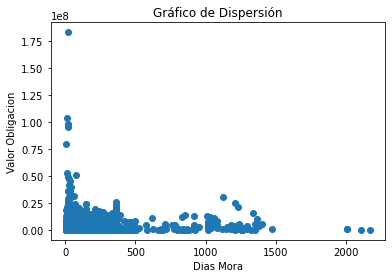

In [295]:

x = rep['Dias Mora']
y = rep['Valor Obligacion']

plt.scatter(x, y)
plt.xlabel('Dias Mora')
plt.ylabel('Valor Obligacion')
plt.title('Gráfico de Dispersión')
plt.show()

De las personas que son reportadas en la primera cuota, podemos observar que la gran mayoría de ellos adquieren un prestamo de valor bajo. Lo que puede relacionar en mayor medida la descripción causal de descuido. 

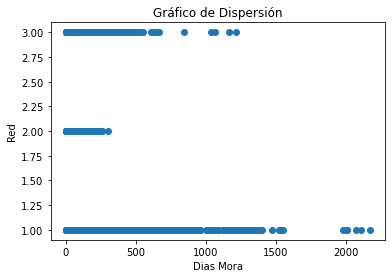

In [296]:

x = data_dummies['Dias Mora']
y = data_real['Red']

plt.scatter(x, y)
plt.xlabel('Dias Mora')
plt.ylabel('Red')
plt.title('Gráfico de Dispersión')
plt.show()

Cuando el método de pago es en efectivo, se nota un aumento en los dias de mora, seguramente relacionado con la descripción causal de descuido. Por otra parte, el debido automatico reduce en mayor medida los días de mora, lo que nos indica que es una excelente estrategia de pago.

Normalización de la base de datos para posterior aplicación del modelo de segmentación 

In [297]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X= scaler.fit_transform(data_dummies)

Punto 3: MODELO DE SEGMENTACIÓN DE CLIENTES EN MORA

In [298]:
data_dummies.columns.tolist()

['Valor Obligacion',
 'Valor Vencido',
 'Dias Mora',
 'FRANJA',
 'Red',
 'Calificacion Real',
 'Endeudamiento',
 'Rango endeudamiento',
 'Abogado',
 'Segmento_MICROPYME',
 'Segmento_PERSONAL PLUS',
 'Segmento_PERSONAS',
 'Segmento_PYMES',
 'Cuadrante_NO TIENE VOLUNTAD Y NO TIENE CAPACIDAD',
 'Cuadrante_NO TIENE VOLUNTAD Y TIENE CAPACIDAD',
 'Cuadrante_SIN CUADRANTE',
 'Cuadrante_TIENE VOLUNTAD Y NO TIENE CAPACIDAD',
 'Cuadrante_TIENE VOLUNTAD Y TIENE CAPACIDAD',
 'Cuadrante_TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA',
 'REGION_ANTIOQUIA',
 'REGION_BOGOTA',
 'REGION_CARIBE',
 'REGION_CENTRO',
 'REGION_SUR',
 'Ocupacion_AMA DE CASA',
 'Ocupacion_EMPLEADO BANCOLOMBIA',
 'Ocupacion_EMPLEADO FILIAL',
 'Ocupacion_EMPLEADO SECTOR PRIVADO',
 'Ocupacion_EMPLEADO SECTOR PUBLICO',
 'Ocupacion_INDEPENDIENTE',
 'Ocupacion_JUBILADO',
 'Ocupacion_NO APLICA A ESTE PRODUCTO',
 'Ocupacion_SIN OFICIO',
 'Ocupacion_TAXISTA',
 'Ocupacion_TRABAJADOR OFICIAL',
 'Descripcion Causal_ACOSTUMBRA A PAGAR ATRASADO'

In [299]:
X = data_dummies[['Dias Mora','FRANJA', "Rango endeudamiento", "Calificacion Real", 'Valor Obligacion', 'Red', "Abogado"]]

In [300]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X= scaler.fit_transform(X)

In [301]:
X

array([[-0.24390967, -0.51027432, -0.16526174, ..., -0.0942462 ,
        -0.46710058,  0.35022255],
       [ 0.8972336 ,  1.96430197, -1.32945104, ..., -0.46271238,
        -0.46710058, -1.18957312],
       [ 0.18401905,  0.31458444, -0.16526174, ..., -0.28196292,
        -0.46710058,  0.35022255],
       ...,
       [ 0.85444073,  1.96430197,  0.99892757, ..., -0.36398224,
        -0.46710058, -1.18957312],
       [ 0.85444073,  1.96430197,  0.99892757, ..., -0.20503494,
        -0.46710058, -1.18957312],
       [ 0.85444073,  1.96430197,  0.99892757, ..., -0.32236369,
        -0.46710058, -1.18957312]])

In [320]:
kmeans = KMeans(n_clusters=4)
modelo_kmeans = kmeans.fit_predict(X)

In [322]:
pd.DataFrame(modelo_kmeans).value_counts() / 89247*100

3   67.92
1   17.81
0   12.26
2    2.00
dtype: float64

In [323]:
X

array([[-0.24390967, -0.51027432, -0.16526174, ..., -0.0942462 ,
        -0.46710058,  0.35022255],
       [ 0.8972336 ,  1.96430197, -1.32945104, ..., -0.46271238,
        -0.46710058, -1.18957312],
       [ 0.18401905,  0.31458444, -0.16526174, ..., -0.28196292,
        -0.46710058,  0.35022255],
       ...,
       [ 0.85444073,  1.96430197,  0.99892757, ..., -0.36398224,
        -0.46710058, -1.18957312],
       [ 0.85444073,  1.96430197,  0.99892757, ..., -0.20503494,
        -0.46710058, -1.18957312],
       [ 0.85444073,  1.96430197,  0.99892757, ..., -0.32236369,
        -0.46710058, -1.18957312]])

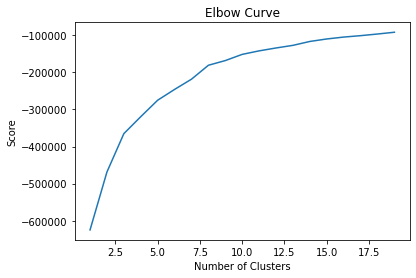

In [324]:

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [325]:
Z = data_dummies[['Dias Mora','FRANJA', "Rango endeudamiento", "Calificacion Real",'Valor Obligacion', 'Red', "Abogado"]]

Z['Label'] = modelo_kmeans

In [326]:
Z


,Dias Mora,FRANJA,Rango endeudamiento,Calificacion Real,Valor Obligacion,Red,Abogado,Label
0,30,1,2,2,5637605.00,1,109978,3
1,110,4,1,3,40584.00,1,109976,0
2,60,2,2,1,2786178.00,1,109978,3
3,90,3,2,1,5904653.00,1,109978,3
4,48,2,2,2,2221125.00,1,109978,3
...,...,...,...,...,...,...,...,...
89242,95,4,3,3,2048599.00,1,109976,0
89243,104,4,3,3,33835903.00,1,109976,0
89244,107,4,3,3,1540300.00,1,109976,0
89245,107,4,3,3,3954718.00,1,109976,0


In [327]:
Z.groupby("Label").describe().T

Label                               0            1           2           3
Dias Mora           count    10945.00     15898.00     1789.00    60615.00
                    mean       170.56        19.89       46.97       31.95
                    std        144.48        19.20       27.49       13.12
                    min         61.00         1.00        1.00        1.00
                    25%        116.00         7.00       25.00       30.00
                    50%        120.00        14.00       46.00       30.00
                    75%        166.00        27.00       57.00       30.00
                    max       2175.00       149.00      360.00       90.00
FRANJA              count    10945.00     15898.00     1789.00    60615.00
                    mean         4.53         1.25        1.96        1.18
                    std          0.87         0.56        0.87        0.40
                    min          3.00         1.00        1.00        1.00
                    25%          4.00         1.00        1.00        1.00
                    50%          4.00         1.00        2.00        1.00
                    75%          5.00         1.00        2.00        1.00
                    max          6.00         5.00        6.00        3.00
Rango endeudamiento count    10945.00     15898.00     1789.00    60615.00
                    mean         2.38         2.84        2.10        1.92
                    std          0.71         0.94        0.53        0.75
                    min          1.00         1.00        1.00        1.00
                    25%          2.00         2.00        2.00        1.00
                    50%          2.00         3.00        2.00        2.00
                    75%          3.00         3.00        2.00        2.00
                    max          5.00         6.00        3.00        5.00
Calificacion Real   count    10945.00     15898.00     1789.00    60615.00
                    mean         2.40         1.72        1.95        1.59
                    std          0.75         0.93        0.81        0.90
                    min          0.00         0.00        0.00        0.00
                    25%          2.00         1.00        1.00        1.00
                    50%          3.00         2.00        2.00        2.00
                    75%          3.00         2.00        3.00        2.00
                    max          3.00         3.00        3.00        3.00
Valor Obligacion    count    10945.00     15898.00     1789.00    60615.00
                    mean   6850989.34  24767759.38  7851328.32  2443583.63
                    std    9366360.63  28069437.38  7972513.15  3435321.68
                    min      20101.00     22600.00    18044.00    20035.00
                    25%    1043570.00   6899344.00  2374146.00   604058.50
                    50%    2764409.00  17501943.23  5517059.00  1286812.00
                    75%    8362067.00  32924050.75 10336902.00  2758947.50
                    max   64016479.00 671335650.10 49539914.00 33774954.00
Red                 count    10945.00     15898.00     1789.00    60615.00
                    mean         1.25         2.44        1.03        1.02
                    std          0.57         0.61        0.25        0.13
                    min          1.00         1.00        1.00        1.00
                    25%          1.00         2.00        1.00        1.00
                    50%          1.00         3.00        1.00        1.00
                    75%          1.00         3.00        1.00        1.00
                    max          3.00         3.00        3.00        2.00
Abogado             count    10945.00     15898.00     1789.00    60615.00
                    mean    109976.10    109977.73   109970.05   109977.98
                    std          0.69         0.69        0.21        0.20
                    min     109970.00    109976.00   109970.00   109976.00
                    25%  

In [328]:
G1 = Z.loc[Z['Label'] == 0]
G2 = Z.loc[Z['Label'] == 1]
G3 = Z.loc[Z['Label'] == 2]
G4 = Z.loc[Z['Label'] == 3]

In [329]:
G1.describe()

,Dias Mora,FRANJA,Rango endeudamiento,Calificacion Real,Valor Obligacion,Red,Abogado,Label
count,10945.00,10945.00,10945.00,10945.00,10945.00,10945.00,10945.00,10945.00
mean,170.56,4.53,2.38,2.40,6850989.34,1.25,109976.10,0.00
std,144.48,0.87,0.71,0.75,9366360.63,0.57,0.69,0.00
min,61.00,3.00,1.00,0.00,20101.00,1.00,109970.00,0.00
25%,116.00,4.00,2.00,2.00,1043570.00,1.00,109976.00,0.00
50%,120.00,4.00,2.00,3.00,2764409.00,1.00,109976.00,0.00
75%,166.00,5.00,3.00,3.00,8362067.00,1.00,109976.00,0.00
max,2175.00,6.00,5.00,3.00,64016479.00,3.00,109978.00,0.00


En este grupo se encuentran los clientes que mayormente tienen en promedio 170 días de mora, tienen un rango de endeudamiento de 1 a 15 millones de pesos, tienen una calificación real de 3 (mala), un valor de obligación de 7 millones apróximadamente, que pagan en efectivo y que la gestión de cobranza fue realizada por el abogado 109976. Se encuentran en el GRUPO 1

In [330]:
G2.describe()

,Dias Mora,FRANJA,Rango endeudamiento,Calificacion Real,Valor Obligacion,Red,Abogado,Label
count,15898.00,15898.00,15898.00,15898.00,15898.00,15898.00,15898.00,15898.00
mean,19.89,1.25,2.84,1.72,24767759.38,2.44,109977.73,1.00
std,19.20,0.56,0.94,0.93,28069437.38,0.61,0.69,0.00
min,1.00,1.00,1.00,0.00,22600.00,1.00,109976.00,1.00
25%,7.00,1.00,2.00,1.00,6899344.00,2.00,109978.00,1.00
50%,14.00,1.00,3.00,2.00,17501943.23,3.00,109978.00,1.00
75%,27.00,1.00,3.00,2.00,32924050.75,3.00,109978.00,1.00
max,149.00,5.00,6.00,3.00,671335650.10,3.00,109978.00,1.00


En este grupo se encuentran los clientes que mayormente tienen en promedio 20 días de mora, tienen un rango de endeudamiento de 15 a 50 millones de pesos, tienen una calificación real de 2 (regular), un valor de obligación de 24 millones apróximadamente, que pagan en débito automático en su mayoría y que la gestión de cobranza fue realizada por el abogado 109978. Se encuentran en el GRUPO 2

In [331]:
G3.describe()

,Dias Mora,FRANJA,Rango endeudamiento,Calificacion Real,Valor Obligacion,Red,Abogado,Label
count,1789.00,1789.00,1789.00,1789.00,1789.00,1789.00,1789.00,1789.00
mean,46.97,1.96,2.10,1.95,7851328.32,1.03,109970.05,2.00
std,27.49,0.87,0.53,0.81,7972513.15,0.25,0.21,0.00
min,1.00,1.00,1.00,0.00,18044.00,1.00,109970.00,2.00
25%,25.00,1.00,2.00,1.00,2374146.00,1.00,109970.00,2.00
50%,46.00,2.00,2.00,2.00,5517059.00,1.00,109970.00,2.00
75%,57.00,2.00,2.00,3.00,10336902.00,1.00,109970.00,2.00
max,360.00,6.00,3.00,3.00,49539914.00,3.00,109971.00,2.00


En este grupo se encuentran los clientes que mayormente tienen en promedio 47 días de mora, tienen un rango de endeudamiento de 1 a 15 millones de pesos, tienen una calificación real de 2 (regular), un valor de obligación de 8 millones apróximadamente, que pagan en efectivo y que la gestión de cobranza fue realizada por el abogado 109970. Se encuentran en el GRUPO 3

In [332]:
G4.describe()

,Dias Mora,FRANJA,Rango endeudamiento,Calificacion Real,Valor Obligacion,Red,Abogado,Label
count,60615.00,60615.00,60615.00,60615.00,60615.00,60615.00,60615.00,60615.00
mean,31.95,1.18,1.92,1.59,2443583.63,1.02,109977.98,3.00
std,13.12,0.40,0.75,0.90,3435321.68,0.13,0.20,0.00
min,1.00,1.00,1.00,0.00,20035.00,1.00,109976.00,3.00
25%,30.00,1.00,1.00,1.00,604058.50,1.00,109978.00,3.00
50%,30.00,1.00,2.00,2.00,1286812.00,1.00,109978.00,3.00
75%,30.00,1.00,2.00,2.00,2758947.50,1.00,109978.00,3.00
max,90.00,3.00,5.00,3.00,33774954.00,2.00,109978.00,3.00


En este grupo se encuentran los clientes que mayormente tienen en promedio 32 días de mora, tienen un rango de endeudamiento de 1 a 15 millones de pesos, tienen una calificación real de 1 (bueno), un valor de obligación de 2 millones apróximadamente, que pagan en efectivo y que la gestión de cobranza fue realizada por el abogado 109978. Se encuentran en el GRUPO 4

Evaluación de la Efectividad de la Gestión de Cobranza